# Simple Linear Regression

Simple Linear Regression memodelkan hubungan antara sebuah response variable dengan sebuah explanatory variable sebagai suatu garis lurus (linear)

Referensi: https://en.wikipedia.org/wiki/Simple_linear_regression

Dalam sesi pembelajaran kali ini, kita akan belajar tentang salah satu model machine learning paling sederhana yaitu "Simple Linear Regression". Model machine learning ini juga umum diperkenalkan seabagai model yang pertama kali di pelajari pada saat kita belajar "Machine Learning". Pada kesempatan kali ini, akan lebih ditekankan pada sisi praktikal dari simple linear regression.

# Sample Dataset

In [1]:
# 01
import pandas as pd 

pizza = {'diameter' : [6, 8, 10, 14, 18],
         'harga' : [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Pada sesi pembelajaran kali ini, kita akan mempersiapkan dataset yang akan kita pakai. Kita akan membentuk dataset yang berisi daftar diameter pizza beserta harganya, dataset ini kita akan tampung ke dalam format pandas data frame.
- Mengimport modul pandas terlebih dahulu.
- Lalu kita siapkan suatu dictionary yang terdiri dari 2 buah key yaitu "diameter" dan "harga" yang setiap key nya akan berasosiasi dengan list.
- "6, 8, 10, 14, dan 18" adalah list untuk diameter, serta "7, 9, 13, 17.5, dan 18" adalah list untuk harga.
- Berikutnya dictionary ini akan kita tampung ke dalam variable pizza untuk selanjutnya kita bentuk sebagai objek data frame.
- Proses pembentukan data frame bisa kita lakukan dengan cara "pd.DataFrame(pizza)", pizza sebagai parameternya yang akan kita tampung ke dalam variable "pizza_df".
- Lalu kita tampilkan isinya.

Jika kita perhatikan dataset diatas terdiri dari 2 buah kolom yaitu kolom diameter dan kolom harga. Pada pembelajaran kita kali ini, kita akan membentuk suatu model machine sederhana yang dapat digunakan untuk memprediksi harga pizza bila diketahui ukuran diamenternya, dengan kata lain disini nilai "diameter" akan berperan sebagai feature sedangkan "harga" akan berperan sebagai target.

# Visualisasi Data

In [2]:
# 02
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

<Figure size 640x480 with 1 Axes>

Pada bagian ini, kita akan mencoba memvisualisasikan dataset "pizza" yang telah kita bentuk sebelumnya ke dalam scatter plot, dimana sumbu x nya akan berasosiasi dengan diameter pizza, sedangkan sumbu y nya akan berasosisasi dengan harga pizza

- Mengimport modul matplotlib yang kita aliaskan sebagai "plt".
- Lalu berikutnya, karena kita ingin melakukan visualisasi berupa scatter plot, makan kita akan memanggil "pizza_df.plot(kind='scatter', x='diameter', y='harga')" dengan tiga parameter.
- Parameter pertama adalah "kind" yang berisi nilai "scatter", karena ploting yang ingin kita hasilkan kali ini adalah scatter plot.
- Parameter selanjutnya adalah x dan y dimana "x" akan kita asosiasikan dengan "diameter" sedangkan "y" akan kita asosiasikan dengan "harga".
- "plt.title" kita gunakan untuk mengeset "judul".
- "plt.xlabel" untuk mengatur tampilan label pada sumbu "x", begitu juga dengan sumbu "y" dengan code "plt.ylabel".
- "plt.xlim" digunakan untuk mengatur jangkauan sumbu "x', begitu juga dengan sumbu "y". (0,25) artinya jangkauan sumbu x dan y nya adalah 0 sampai dengan 25.
- "plt.grid(True)" digunakan untuk mengaktifkan gridnya.
- "plt.show()" digunakan untuk menampilkan plotting yang sudah kita buat.
- Jika kita perhatikan pada hasil plotting diatas, setiap data point atau markernya (bulat-bulat biru) pada code akan merepresentasikan satu baris dari data frame yang kita miliki. Jika kita melihat hasil source code 01, data yang kita miliki terdiri dari 5 instance atau baris, setiap barisnya akan direpresentasikan dengan satu marker yang ada pada hasil source code 02. Oleh karena itu, pada hasil source code 02 kita bisa melihat adanya 5 marker atau titik biru dan bila kita perhatikan seolah-olah akan membentuk suatu garis lurus.
- Hasil source code 02 merupakan kasus yang sangat tepat untuk menerapkan linear regression, karena model linear regression ini akan berkaitan dengan persamaan garis lurus.

Perlu diperhatikan lagi bahwa pada eksplorasi kali ini bertujuan untuk mencoba memprediksi harga pizza bila diketahui diameternya dan kita akan akan mencoba memecahkan permasalahan ini dengan memanfaatkan model machine learning yaitu "Simple Linear Regression"

# Simple Linear Regression Model 

Setelah kita memahami konteks dataset dan juga permasalahannya, kita akan mencoba menerapkan "Simple Linear Regression Model" sebagai solusi. Sesuai dengan namanya, model machine learning yang satu ini memang digunakan untuk menyelesaikan regression task.

# Penyesuaian Dataset

In [3]:
# 03
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'Y: {y}')

X: [ 6  8 10 14 18]
Y: [ 7.   9.  13.  17.5 18. ]


Disini kita akan melakukan beberapa penyesuaian terhadap dataset pizza yang kita miliki.
- Langkah pertama yang kita lakukan adalah mengelompokkan feature dan target ke dalam 2 variabel terpisah.
- Selanjutnya kita akan melkaukan konversi struktur data dari yang semula menggunakan pandas data frame menjadi numpy array.

Langkah code 03 :
- Melakukan import numpy as np.
- Untuk diameter, karena diameter ini merupakan feature maka akan kita konversikan terlebih dahulu lalu kita koversikan menjadi suatu numpy array yang beikutnya akan kita tampung kedalam variabel "x", dimana variabel "x" akan kita pandang sebagai features.
- Lalu berikutnya, untuk kolom harga akan kita koversikan menjadi numpy array dan nilainya akan ditampung ke dalam variabel "y' sebagai variabel target.
- "X: [ 6  8 10 14 18]" merupakan kumpulan nilai features.
- "Y: [ 7.   9.  13.  17.5 18. ]" merupakan kumpulan nilai target.

Jika kita perhatikan pada variabel x yang digunakan untuk menampung nilai features hanya terdiri dari 1 dimensi saja padahal kita mengetahui bahwa model machine learning yang disertakan pad SKlearn membutuhkan sekumpulan nilai features yang ditampung dalam suatu array 2 dimensi. Oleh karena itu, pada kali ini kita perlu melakukan proses reshapping terhadap array yang digunakan untuk menampung nilai features ini.

In [4]:
# 04
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [5]:
# 05
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

Alur berpikir code 04 :
- Memanggil "X.reshape(-1, 1)" yang kita beri nilai parameternya adalah -1 dan 1 yang ditampung ke dalam variabel "X".
- "X.shape" digunakan untuk menampilkan shape atau dimensi dari "X" setelah proses reshapping.
- Bila kita lihat, setelah proses reshapping, dimensinya menjadi (5,1) dan jika kita pada source code 05, merupakan hasil dari proses reshapping, dimana variable x akan menampung suatu array 2 dimensi dimana jumlah barisnya berjumlah 5 dan jumlah kolomnya berjumlah 1.

# Training Simple Linear Regression Model

Pada kali ini kita, kita akan melakukan proses training model machine learning dimana model yang akan kita pilih adalah "Linear Regression"

In [6]:
# 06
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

Langkah code 06 :
- Pertama-tama, kita perlu import estimeter classnya yang kita gunakan kali ini adalah linear regression dengan cara "from sklearn.linear_model import LinearRegression".
- Berikutnya, kita akan membuat objek model dari estemater class ini dengan cara "LinearRegression()" yang kita tampung ke dalam varibel "model".
- Selanjutnya, objek model ini akan kita training dengan cara memanggi method Fit "model.fit(X, y)" yang membutuhkan 2 buah parameter yaitu sekumpulan nilai features dan juga nilai targetnya dimana sekumpulan nilai features dan targetnya sudah kita tempatkan kedalam variable "X" dan "y".
- jika sudah muncul output "LinearRegression()" berarti proses training modelnya sudah selesai, sekarang objek model kita berstatus train model atau objek model yang sudah di training.

# Visualisasi Simple Linear Regression Model 

In [7]:
# 07
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

Pola berpikir code 07 :
- Pertama-tama kita akan siapkan dua buah nilai untuk x atau featuresnya yaitu nilai (0, 25). Kedua nilai ini kita tentukan karena pada kali ini kita akan melakukan ploting pada area dengan ukuran 25x25, dan disini kita ambil nilai terkecil dan nilai terbesarnya yaitu o dan 25.
- Kita akan siapkan 2 buah nilai untuk features yaitu 0 dan 25 dan kedua nilai ini akan kita bentuk sebagi numpy array.
- Karena numpy array akan digunakan sebagai features, maka perlu kita reshape agar menghasilkan array 2 dimensi dengan memanggil "reshape(-1, 1)" yang kita tampung ke dalam variable "X_vis".
- Lalu berikutnya, berdarsarkan nilai "X_vis", kita akan melakukan prediksi terhadap nilai y nya dengan memanggil "model.predict(X_vis)" yang kita tampung ke dalam variabel "y_vis".

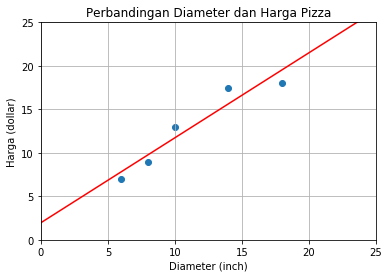

In [8]:
# 08
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0,25)
plt.grid(True)
plt.show()

Pola berpikir code 08 :
- Pertama-tama kita akan memanggil "plt.scatter" dan sertakan nilai "X" dan "y" yang kita miliki dari dataset sebelumnya yang digunakan untuk melakukan ploting marker berwarna biru yang berjumlah 5 yang merepresentasikan 5 instance atau 5 data point dari datset yang kita miliki.
- Lalu selanjutnya, kita juga melakukan "plt.plot" untuk melakukan plotting garis yang bewarna merah. Yang kita plotting adalah nilai "X" dan nilai "y' yang digunakan untuk melakukan proses visualisasi. Dimana nilai "X" ada 2 yaitu 0 dan 25. Nilai  "y" dihasilkan dari proses prediksi "model.predict" dari setiap nilai X_vis nya yang ditampung dalam variable "y_vis" pada code #07, lalu visualisasi nya kita gunakan '-r', dimana '-' akan membentuk suatu garis lurus dan 'r' akan berkolerasi dengan dengan warna merah.


Disini, kita akan berfokus pada garis linearnya (yang berwarna merah). Garis linear yang terbentuk pada code 08 akan memiliki formula persamaan yang mengacu pada formula linear regression di bawah ini

# Formula Linear Regression: y = α + βx

- y : Response Variable
- x : Explanatory Variable
- α : Intercept
- β : Slope

In [9]:
# 09
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')
      

intercept: 1.965517241379315
slope: [0.9762931]


Bisa kita lihat dari hasil code 09 bahwa :
- Nilai interceptnya adalah "1.965517241379315" menunjuka titik awal mulai garis yang bewarna merah.
- Nilai slopenya adalah "0.9762931"

# Mencari Nilai Slope

Nilai slope pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut : 

# $β  = \frac{cov(x,y)}{var(x)}$

In [10]:
# 10
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'Y\y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

Y\y: [ 7.   9.  13.  17.5 18. ]


Pola berpikir code 10 :
- Jika kita melihat hasil code "print(f'X:\n{X}\n')", nilai x kita berbentuk 2 dimensi dengan jumlah baris 5 dan jumlah kolom 1.
- "flatten: X.flatten()" method faltten ini bisa kita gunakan untuk mengembalikan kepada bentuk asal. Dari yang tadinya 2 dimensi kembali menjadi 1 dimensi.
- "{y}" untuk menampilkan nilai y yang sudah berbentuk 1 dimensi. 

# Variance

In [11]:
# 11
variance_x = np.var(X.flatten(), ddof=1)

print(f'variance : {variance_x}')

variance : 23.2


Pola berpikir code 11 :
- Memanggil "np.var". Nilai variance ini akan membutuhkan 2 parameter. Parameter pertama adalah nilai dari variable x yang sudah di flatten kan. Parameter kedua yaitu ddof yaitu "degree of freedom" yang kita set dengan angka 1. Hasil perhitungan ditampung ke dalam variable "variance_x".
- Lalu menampilkan hasilnya, yang pada kali ini hasilnya adalah 23.2

# Covariance

In [12]:
# 12
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

Pola berpikir code 12 :
- Memanggil np.cov, lalu membutuhkan 2 parameter. Parameter pertama adalah nilai x yang sudah di flatten kan, lalu parameter kedua adalah y.
- Pemanggilan fungsi "np.cov" ini akan menghasilkan covariance matriks yang terdiri dari 2 kolom dan 2 baris, tetapi nilai yang mau kita gunakan adalah "22.65" dan "22.65" atau yang berada dalam diagonal atau bersebrangan. 

In [13]:
# 13
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance: {covariance_xy}')

# Kita juga bisa menggunakan X.patern() pada script ini

covariance: 22.650000000000002


# Slope

In [14]:
# 14
slope = covariance_xy / variance_x

print(f'slope : {slope}')

# Nilainya sama persis seperti pada code 09

slope : 0.976293103448276


# Mencari Nilai Intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan memanfaatkan formula berikut :

  $α = \ \bar{y} \ - \ β \bar{x}$

- α = Nilai intercept / nilai alpha.
- $\bar{y}$ = Nilai rata-rata target.
- $β \bar{x}$ = Slope dikali nilai rata-rata x.

In [15]:
# 15
intercept = np.mean(y) - slope * np.mean(X)

print(f'intercept: {intercept}') 

intercept: 1.9655172413793096


# Prediksi Harga Pizza

Setelah kita memahami proses kalkulasi slope dan intercept, berikutnya kita akan menggunakan model linear regression yang telah kita training sebelumnya untuk memprediksi harga pizza berdasarkan ukuran diameternya. Untuk kasus kali ini, kita akan memprediksi harga pizza berdasarkan 3 nilai diameter.

In [16]:
# 16
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

Pola berpikir code 16 :
- Kita sudah menyiapkan 3 nilai diameter yaitu 12, 20, dan 23 sebagai features yang akan kita prediksi.
- Ketiga nilai ini akan kita bundle sebagai suatu numpy array.
- Karena kita hanya memiliki satu nilai features yaitu diameter saja, maka array nya perlu kita reshape untuk menjadi array 2 dimensi pada code "reshape(-1, 1)".
- Lalu nilai array yang terbentuk ini kita tampung ke dalam variable diameter_pizza.

In [17]:
# 17
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

Kita bisa memanfaatkan model linear regression yang sudah kita training sebelumnya untuk memprediksi harga pizza.

In [18]:
# 18 Mempercantik tampilan agar lebiih mudah dipahami
for dmtr, hrg in zip(diameter_pizza, prediksi_harga) :
    print(f'Diameter: {dmtr} Prediksi Harga: {hrg}')

Diameter: [12] Prediksi Harga: 13.681034482758621
Diameter: [20] Prediksi Harga: 21.491379310344826
Diameter: [23] Prediksi Harga: 24.42025862068965


# Evaluasi Simple Linear Regression Model

# Training & Testing Dataset

In [19]:
# 19
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

# X merepresentasikan data features.
# y merepresentasikan data target.

# Training Simple Linear Regression Model

In [20]:
# 20
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-squared  $(R^2)$

Referensi : http://en.wikipedia.org/wiki/Coefficient_of_determination

In [21]:
# 21
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R squared: {r_squared}')

R squared: 0.6620052929422553


Pola berpikir code 21 :
- Mengimport matriks evaluasi yang kita import adalah r2_score.
- Selanjutnya kita akan melakukan proses prediksi nilai target dengan memanfaatkan nilai features pada testing set kita yang nilai prediksinya kita tampung kedalam variabel y_pred.
- Mengukur nilai "y" hasil prediksi dan nilai "y" real dengan memanggil fungsi "r2_score(y_test, y_pred)" yang ditampung ke dalam variable "r_squared".
- Lalu tampilkan dengan print.
- Nilai r squared nya adalah "0.6620052929422553". Nilai r squared semakin dia mendekati 1 (satu) akan semakin baik, tetapi jika semakin menjauhi 1 atau semakin mendekati nilai 0 akan semakin buruk. Lalu yang terburuknya akan mendapat nilai negatif

# Mencari Nilai R-squared ($R^2$)

$R^2 = 1 - \frac{SS_res}{SS_tot}$

- ss_res merepresentasikan some square residual.
- ss_tot merepresentasikan some square total.

  $SSres = \sum_{i=1}^{n} (yi - f(X_i))^2$

- ss_res pada dasarnya adalah proses perhitungan selisih antara setiap nilai y pada testing set dengan nilai prediksinya.
- Lalu nilai selisihnya dipangkatkan dua dan kita jumlahkan secara keseluruhan.
- Atau dengan kata lain, kita sebenernya menghitung nilai errornya atau akumulasi errornya.

  $SStot = \sum_{i=1}^{n} (yi - \bar{y})^2$

- ss_tot pada dasarnya adalah proses perhitungan selisih nilai untuk setiap nilai y pada testing set dengan nilai rata-ratanya.
- Lalu kita pangkatkan 2.
- Selanjutnya kita akan akumulasikan dengan keseluruhan nilai y yang ada.

 $SSres$

In [25]:
# 22 Mencari nilai some square residual 

ss_res = sum([(y_i - model.predict(x_i.reshape(-1, 1))[0])**2
               for x_i, y_i in zip(X_test, y_test)])

print(f'ss_res: {ss_res}')

ss_res: 19.1980993608799


 $SStot$

In [26]:
# 23 Mencari nilai some square total

mean_y = np.mean(y_test)
ss_tot = sum([(y_i - mean_y)**2 for y_i in y_test])

print(f'ss_tot: {ss_tot}')

ss_tot: 56.8


 R$^2$

In [27]:
# 24 Setelah kita mendapatkan nilai some square residual dan total, baru kita dapat mendapatkan nilai R 2 nya

r_squared = 1 - (ss_res / ss_tot)

print(f'R squared: {r_squared}')

R squared: 0.6620052929422553


Untuk pembelajaran lebih lengkapnya jangan lupa untuk mengunjungi channel youtube indonesia belajar pada link "https://www.youtube.com/watch?v=tiREcHrtDLo"

# "Banyak Belajar, Biar Bisa Bantu Banyak Orang"

By : Clarence Code Pianist